# Morphing basis animations

Let's make something cool:

![morphing animation](morphing.gif)

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
%matplotlib inline
import sys

try:
    from madminer.morphing import Morpher
except ImportError:
    sys.path.append('../..')
    from madminer.morphing import Morpher
    

## Settings

In [2]:
n_runs = 10
n_resolution = 200
n_frames = 8 * 25

randomness1 = 0.3
randomness2 = 0.6

## Preparation

In [3]:
morpher = Morpher(parameter_max_power=[4,4],
                  parameter_range=[(-1.,1.), (-1.,1.)])
_ = morpher.find_components(max_overall_power=4)

In [4]:
xi = np.linspace(-1.,1.,n_resolution)
yi = np.linspace(-1.,1.,n_resolution)
xx, yy = np.meshgrid(xi, yi)
xx = xx.reshape((-1,1))
yy = yy.reshape((-1,1))
theta_evaluation = np.hstack([xx, yy])

## Basis evaluation

In [5]:
def evaluate_basis(basis=None):
    
    # Optimization
    if basis is None:
        basis = morpher.optimize_basis(n_bases=1)

    # Evaluate basis
    squared_weights = []

    for theta in theta_evaluation:
        wi = morpher.calculate_morphing_weights(theta, basis)
        squared_weights.append(np.sum(wi*wi)**0.5)

    squared_weights = np.array(squared_weights).reshape((n_resolution,n_resolution))
    
    return squared_weights

## Basis point trajectories

In [6]:
def initialize_trajectories():
    global theta1, theta2, theta_phase, theta_order
    
    theta_fix = np.array([[ 0.        ,  0.        ],
       [-0.8318245 ,  0.85645093],
       [-0.82002127, -0.85191237],
       [ 0.76870769, -0.81272456],
       [ 0.7819962 ,  0.86242685],
       [-0.57243257,  0.37755934],
       [-0.29730939,  0.74563426],
       [ 0.13777926,  0.35254704],
       [ 0.46330191,  0.51783982],
       [ 0.64649576, -0.01232633],
       [ 0.16629182, -0.29365045],
       [ 0.39752054, -0.64235507],
       [-0.19238158, -0.59962178],
       [-0.30730345, -0.09697784],
       [-0.70631846, -0.18913046]])
    
    n_benchmarks = theta_fix.shape[0]
    
    theta_order = np.random.randint(1, 4, (n_benchmarks,2))
    
    random_points = -1. + 2.*np.random.rand(n_benchmarks,2)
    random_point_weights = randomness1 * np.random.rand(n_benchmarks,2) / theta_order.astype(np.float)
    theta1 = (1.-random_point_weights)*theta_fix + random_point_weights*random_points
    
    random_points = -1. + 2.*np.random.rand(n_benchmarks,2)
    random_point_weights = randomness2 * np.random.rand(n_benchmarks,2) / theta_order.astype(np.float)
    theta2 = (1.-random_point_weights)*theta_fix + random_point_weights*random_points

    theta_phase = 2.*np.pi*np.random.rand(n_benchmarks,2)
    #theta_phase[:,1] = theta_phase[:,0] + np.random.normal(np.pi/2, np.pi/4, n_benchmarks)

In [7]:
def calculate_basis(t):
    basis = 0.5 * (
        (theta1 + theta2)
        + (theta1 - theta2)
        * np.sin(2.*np.pi * theta_order * t / n_frames + theta_phase)
    )
    return basis

## Animation

In [8]:
def initialize_animation():
    global basis, squared_weights
    
    initialize_trajectories()
    basis = calculate_basis(0)
    squared_weights = evaluate_basis(basis)

In [9]:
def update(t):
    global basis, squared_weights
    
    basis = calculate_basis(t)
    squared_weights = evaluate_basis(basis)
    
    scatter.set_offsets(basis)
    pcm.set_array(squared_weights[:-1,:-1].ravel())
    
    if (t + 1) % 10 == 0:
        print('  Frame', t + 1, '/', n_frames)
    

In [10]:
def make_animation(i):
    global pcm, scatter
    
    fig = plt.figure(figsize=(5.,4.))
    ax = plt.gca()

    pcm = ax.pcolormesh(xi, yi, squared_weights,
                       norm=matplotlib.colors.LogNorm(vmin=.5, vmax=200.),
                       cmap='viridis_r')
    cbar = fig.colorbar(pcm, ax=ax, extend='both')

    scatter = plt.scatter(basis[:,0], basis[:,1], s=40., c='black')

    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    cbar.set_label(r'$\sqrt{\sum w_i^2}$')
    plt.xlim(-1.,1.)
    plt.ylim(-1.,1.)

    plt.tight_layout()

    anim = FuncAnimation(fig, update, frames=np.arange(0, n_frames), interval=40)
    anim.save('animations/run_' + str(i) + '.gif', dpi=120, writer='imagemagick')
    #anim.save('animations/run_' + str(i) + '.avi')


## Main loop

('Run', 1, '/', 10)
('  Frame', 10, '/', 200)
('  Frame', 20, '/', 200)
('  Frame', 30, '/', 200)
('  Frame', 40, '/', 200)
('  Frame', 50, '/', 200)
('  Frame', 60, '/', 200)
('  Frame', 70, '/', 200)
('  Frame', 80, '/', 200)
('  Frame', 90, '/', 200)
('  Frame', 100, '/', 200)
('  Frame', 110, '/', 200)
('  Frame', 120, '/', 200)
('  Frame', 130, '/', 200)
('  Frame', 140, '/', 200)
('  Frame', 150, '/', 200)
('  Frame', 160, '/', 200)
('  Frame', 170, '/', 200)
('  Frame', 180, '/', 200)
('  Frame', 190, '/', 200)
('  Frame', 200, '/', 200)
('Run', 2, '/', 10)
('  Frame', 10, '/', 200)
('  Frame', 20, '/', 200)
('  Frame', 30, '/', 200)
('  Frame', 40, '/', 200)
('  Frame', 50, '/', 200)


KeyboardInterrupt: 

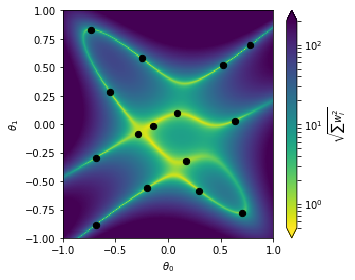

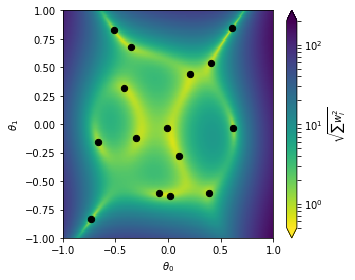

In [11]:
for i in range(n_runs):
    print('Run', i + 1, '/', n_runs)
    initialize_animation()
    make_animation(i)